In [1]:
import plotly.express as px 
import pandas as pd 
import numpy as np 
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import datetime
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
from sklearn import svm

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

from __future__ import absolute_import,division,print_function,unicode_literals

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

print("Import Succesfull")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Import Succesfull


In [2]:
pip install missingno

In [3]:
# Get some data
df = pd.read_excel("/content/drive/My Drive/Capstone_Commodity_SureshaHP/Onion/Onion_21Aug2020.xlsx")

In [4]:
df.head(10)

,Date,AHMEDABAD_WholesalePrice,AHMEDABAD_RetailPrice,AHMEDABAD_Volume,Bengaluru_WholesalePrice,Bengaluru_RetailPrice,Bengaluru_Volume,CHENNAI_WholesalePrice,CHENNAI_RetailPrice,CHENNAI_Volume,DELHI_WholesalePrice,DELHI_RetailPrice,DELHI_Volume,HYDERABAD_WholesalePrice,HYDERABAD_RetailPrice,HYDERABAD_Volume,KOLKATA_WholesalePrice,KOLKATA_RetailPrice,KOLKATA_Volume,MUMBAI_WholesalePrice,MUMBAI_RetailPrice,MUMBAI_Volume,PUNE_WholesalePrice,PUNE_RetailPrice,PUNE_Volume,JAIPUR_WholesalePrice,JAIPUR_RetailPrice,JAIPUR_Volume,RANCHI_WholesalePrice,RANCHI_RetailPrice,RANCHI_Volume,DieselPrice
0,2015-01-01,1359.0,2317.0,13405.0,1758.0,2791.0,74978.0,2132.0,2924.0,11440.0,1521.0,2723.0,20839.0,2029.0,2775.0,11728.0,1752.0,2893.0,46208.0,1449.0,2060.0,30998.0,1529.0,2119.0,32503.0,1310.0,2306.0,12755.0,1757.0,2282.0,5216.0,53.74
1,2015-02-01,1569.0,2300.0,13009.0,1815.0,2750.0,42164.0,2231.0,3100.0,18750.0,1663.0,2900.0,20812.0,1724.0,2435.0,5170.0,1998.0,3033.0,33966.0,1509.0,2227.0,24458.0,1445.0,1985.0,26202.0,1586.0,2862.0,8270.0,1714.0,2421.0,5661.0,51.96
2,2015-03-01,1389.0,2285.0,11983.0,1576.0,2396.0,41339.0,2116.0,2824.0,13200.0,1457.0,2554.0,24463.0,1352.0,2138.0,9450.0,1451.0,2400.0,9354.0,1364.0,1977.0,36627.0,1345.0,1960.0,26951.0,1483.0,2673.0,6196.0,1442.0,2142.0,6385.0,55.41
3,2015-04-01,1099.0,2300.0,14303.0,1455.0,2260.0,43534.0,1878.0,2635.0,16820.0,1425.0,2426.0,22346.0,1433.0,2093.0,8210.0,1692.0,2484.0,12859.0,1120.0,1717.0,26284.0,1244.0,1795.0,29076.0,1252.0,2052.0,8867.0,1133.0,1887.0,5962.0,52.56
4,2015-05-01,1140.0,2300.0,13349.0,1725.0,2458.0,44227.0,2023.0,2754.0,13555.0,1431.0,2280.0,26577.0,1640.0,2314.0,8510.0,1756.0,2650.0,10608.0,1279.0,1854.0,25304.0,1392.0,1937.0,24638.0,1384.0,1743.0,13222.0,894.0,1571.0,5682.0,58.19
5,2015-06-01,1582.0,2486.0,11567.0,2182.0,3145.0,43403.0,2519.0,3412.0,13350.0,1750.0,2450.0,27654.0,1717.0,2542.0,13762.0,2267.0,3226.0,13200.0,1814.0,2667.0,18031.0,2070.0,2741.0,30150.0,1628.0,1958.0,11098.0,1890.0,2504.0,5940.0,56.69
6,2015-07-01,1957.0,3375.0,11451.0,2357.0,3314.0,45957.0,2671.0,3833.0,12600.0,2083.0,3285.0,24497.0,1750.0,2555.0,9908.0,2670.0,3731.0,7296.0,2148.0,3231.0,21415.0,1813.0,2513.0,35148.0,1897.0,2950.0,9289.0,1955.0,2688.0,5620.0,53.37
7,2015-08-01,3838.0,5571.0,7103.0,2727.0,4029.0,83437.0,4920.0,6144.0,13260.0,3612.0,6128.0,20709.0,2368.0,3284.0,9578.0,4454.0,5683.0,7856.0,3904.0,6000.0,25300.0,4486.0,5448.0,12429.0,3602.0,4878.0,7062.0,3779.0,4816.0,2915.0,48.23
8,2015-09-01,4180.0,6762.0,7425.0,2536.0,4391.0,114533.0,5326.0,9148.0,12180.0,3961.0,6278.0,24823.0,2527.0,3953.0,5260.0,4856.0,6213.0,6720.0,4600.0,6227.0,20708.0,3918.0,5153.0,8330.0,4072.0,5978.0,7110.0,4735.0,5750.0,1476.0,47.70
9,2015-10-01,2757.0,5958.0,13974.0,2223.0,3914.0,173788.0,3804.0,7113.0,11170.0,3004.0,5058.0,22575.0,2026.0,3300.0,13768.0,3696.0,5242.0,9340.0,3462.0,5238.0,22159.0,3253.0,4140.0,7946.0,2782.0,4087.0,8628.0,3475.0,4370.0,5175.0,49.26


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      67 non-null     datetime64[ns]
 1   AHMEDABAD_WholesalePrice  65 non-null     float64       
 2   AHMEDABAD_RetailPrice     65 non-null     float64       
 3   AHMEDABAD_Volume          65 non-null     float64       
 4   Bengaluru_WholesalePrice  65 non-null     float64       
 5   Bengaluru_RetailPrice     65 non-null     float64       
 6   Bengaluru_Volume          65 non-null     float64       
 7   CHENNAI_WholesalePrice    63 non-null     float64       
 8   CHENNAI_RetailPrice       63 non-null     float64       
 9   CHENNAI_Volume            63 non-null     float64       
 10  DELHI_WholesalePrice      63 non-null     float64       
 11  DELHI_RetailPrice         63 non-null     float64       
 12  DELHI_Volume            

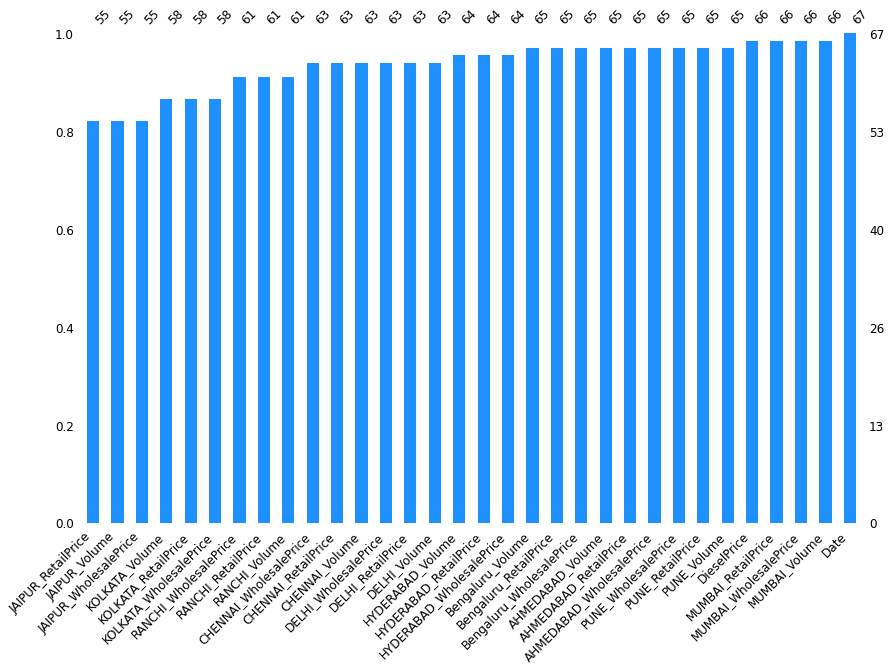

In [6]:
import missingno as msno 
# Visualize the number of missing 
# values as a bar chart 
msno.bar(df,color="dodgerblue", sort="ascending", figsize=(14,9), fontsize=12)

In [7]:
print("Rows     :", df.shape[0])
print("Columns  :", df.shape[1])
print("\n Features \n", df.columns.to_list())
print("\n Missing Values \n", df.isnull().any())
print("\n Unique Values \n", df.nunique())

Rows     : 67
Columns  : 32

 Features 
 ['Date', 'AHMEDABAD_WholesalePrice', 'AHMEDABAD_RetailPrice', 'AHMEDABAD_Volume', 'Bengaluru_WholesalePrice', 'Bengaluru_RetailPrice', 'Bengaluru_Volume', 'CHENNAI_WholesalePrice', 'CHENNAI_RetailPrice', 'CHENNAI_Volume', 'DELHI_WholesalePrice', 'DELHI_RetailPrice', 'DELHI_Volume', 'HYDERABAD_WholesalePrice', 'HYDERABAD_RetailPrice', 'HYDERABAD_Volume', 'KOLKATA_WholesalePrice', 'KOLKATA_RetailPrice', 'KOLKATA_Volume', 'MUMBAI_WholesalePrice', 'MUMBAI_RetailPrice', 'MUMBAI_Volume', 'PUNE_WholesalePrice', 'PUNE_RetailPrice', 'PUNE_Volume', 'JAIPUR_WholesalePrice', 'JAIPUR_RetailPrice', 'JAIPUR_Volume', 'RANCHI_WholesalePrice', 'RANCHI_RetailPrice', 'RANCHI_Volume', 'DieselPrice']

 Missing Values 
 Date                        False
AHMEDABAD_WholesalePrice     True
AHMEDABAD_RetailPrice        True
AHMEDABAD_Volume             True
Bengaluru_WholesalePrice     True
Bengaluru_RetailPrice        True
Bengaluru_Volume             True
CHENNAI_Wholes

In [8]:
df.describe()

,AHMEDABAD_WholesalePrice,AHMEDABAD_RetailPrice,AHMEDABAD_Volume,Bengaluru_WholesalePrice,Bengaluru_RetailPrice,Bengaluru_Volume,CHENNAI_WholesalePrice,CHENNAI_RetailPrice,CHENNAI_Volume,DELHI_WholesalePrice,DELHI_RetailPrice,DELHI_Volume,HYDERABAD_WholesalePrice,HYDERABAD_RetailPrice,HYDERABAD_Volume,KOLKATA_WholesalePrice,KOLKATA_RetailPrice,KOLKATA_Volume,MUMBAI_WholesalePrice,MUMBAI_RetailPrice,MUMBAI_Volume,PUNE_WholesalePrice,PUNE_RetailPrice,PUNE_Volume,JAIPUR_WholesalePrice,JAIPUR_RetailPrice,JAIPUR_Volume,RANCHI_WholesalePrice,RANCHI_RetailPrice,RANCHI_Volume,DieselPrice
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,64.000000,64.000000,64.000000,58.000000,58.000000,58.000000,66.000000,66.000000,66.000000,65.000000,65.000000,65.000000,55.000000,55.000000,55.000000,61.000000,61.000000,61.000000,66.000000
mean,1411.661538,2982.492308,13501.615385,1543.107692,2590.338462,54324.353846,2291.031746,3414.269841,12446.333333,1678.857143,3046.857143,23677.206349,1677.421875,3071.343750,29736.968750,2165.793103,3246.327586,13293.603448,1684.090909,2606.636364,43933.772727,1625.600000,2701.169231,23153.338462,1580.272727,2641.072727,9816.472727,1928.836066,2652.262295,7204.688525,61.314545
std,1159.751567,1795.441782,4547.792204,1152.878437,1622.108006,30524.050444,1532.311926,2066.982296,3899.211260,1177.439100,1754.092807,5516.460594,1069.721649,1921.577429,24741.644636,1615.224006,2183.032177,9354.473190,1355.408332,2022.466291,25748.729569,1301.529783,2737.924868,12800.071685,1278.520419,2090.702016,4686.411933,1424.609364,1691.159986,2717.148417,7.783531
min,318.000000,1463.000000,3368.000000,491.000000,1035.000000,14927.000000,961.000000,1728.000000,4642.000000,430.000000,804.000000,10560.000000,668.000000,1439.000000,4426.000000,463.000000,754.000000,4040.000000,533.000000,1000.000000,8785.000000,490.000000,776.000000,6916.000000,481.000000,805.000000,149.000000,429.000000,817.000000,237.000000,47.700000
25%,650.000000,1961.000000,10844.000000,805.000000,1513.000000,39474.000000,1324.500000,2071.500000,11230.000000,846.500000,2017.500000,20610.000000,939.250000,1957.500000,9392.000000,1071.500000,1823.750000,6912.000000,850.750000,1417.250000,30688.250000,802.000000,1240.000000,14935.000000,725.000000,1500.000000,7542.000000,966.000000,1543.000000,5829.000000,55.290000
50%,922.000000,2285.000000,13820.000000,1113.000000,2091.000000,48478.000000,1809.000000,2742.000000,12720.000000,1349.000000,2523.000000,23397.000000,1421.500000,2339.500000,31158.000000,1754.000000,2714.000000,10923.000000,1184.000000,1991.000000,35356.500000,1194.000000,1795.000000,20925.000000,1175.000000,2000.000000,10176.000000,1448.000000,2200.000000,6732.000000,60.530000
75%,1823.000000,3375.000000,16940.000000,1966.000000,3096.000000,57637.000000,2502.500000,3771.000000,13517.500000,1958.500000,3614.000000,25485.000000,1903.250000,3331.500000,40424.500000,2682.750000,4001.500000,16047.750000,1964.750000,2772.750000,49586.250000,1813.000000,2816.000000,29076.000000,1920.500000,2915.000000,12731.500000,2309.000000,3018.000000,9506.000000,68.162500
max,6034.000000,9625.000000,22966.000000,7792.000000,10604.000000,173788.000000,9931.000000,13444.000000,26180.000000,6945.000000,10760.000000,47644.000000,7044.000000,11440.000000,152792.000000,9538.000000,12438.000000,47808.000000,8059.000000,12643.000000,142723.000000,7838.000000,15000.000000,78872.000000,7319.000000,11594.000000,21141.000000,7916.000000,9854.000000,11900.000000,77.170000


# Handling Missing values

In [9]:
df.isnull().sum()

Date                         0
AHMEDABAD_WholesalePrice     2
AHMEDABAD_RetailPrice        2
AHMEDABAD_Volume             2
Bengaluru_WholesalePrice     2
Bengaluru_RetailPrice        2
Bengaluru_Volume             2
CHENNAI_WholesalePrice       4
CHENNAI_RetailPrice          4
CHENNAI_Volume               4
DELHI_WholesalePrice         4
DELHI_RetailPrice            4
DELHI_Volume                 4
HYDERABAD_WholesalePrice     3
HYDERABAD_RetailPrice        3
HYDERABAD_Volume             3
KOLKATA_WholesalePrice       9
KOLKATA_RetailPrice          9
KOLKATA_Volume               9
MUMBAI_WholesalePrice        1
MUMBAI_RetailPrice           1
MUMBAI_Volume                1
PUNE_WholesalePrice          2
PUNE_RetailPrice             2
PUNE_Volume                  2
JAIPUR_WholesalePrice       12
JAIPUR_RetailPrice          12
JAIPUR_Volume               12
RANCHI_WholesalePrice        6
RANCHI_RetailPrice           6
RANCHI_Volume                6
DieselPrice                  1
dtype: i

In [10]:
df.isnull()

,Date,AHMEDABAD_WholesalePrice,AHMEDABAD_RetailPrice,AHMEDABAD_Volume,Bengaluru_WholesalePrice,Bengaluru_RetailPrice,Bengaluru_Volume,CHENNAI_WholesalePrice,CHENNAI_RetailPrice,CHENNAI_Volume,DELHI_WholesalePrice,DELHI_RetailPrice,DELHI_Volume,HYDERABAD_WholesalePrice,HYDERABAD_RetailPrice,HYDERABAD_Volume,KOLKATA_WholesalePrice,KOLKATA_RetailPrice,KOLKATA_Volume,MUMBAI_WholesalePrice,MUMBAI_RetailPrice,MUMBAI_Volume,PUNE_WholesalePrice,PUNE_RetailPrice,PUNE_Volume,JAIPUR_WholesalePrice,JAIPUR_RetailPrice,JAIPUR_Volume,RANCHI_WholesalePrice,RANCHI_RetailPrice,RANCHI_Volume,DieselPrice
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
63,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
64,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,True,True,True,True,True,True,True,False
65,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True,True,False


In [11]:
df1=df.drop('Date',axis=1)

In [12]:
#fill NA with mean() of each column in onion dataset
df1 = df1.apply(lambda x: x.fillna(x.mean()),axis=0)

In [13]:
print("\n Missing Values \n", df1.isnull().any())


 Missing Values 
 AHMEDABAD_WholesalePrice    False
AHMEDABAD_RetailPrice       False
AHMEDABAD_Volume            False
Bengaluru_WholesalePrice    False
Bengaluru_RetailPrice       False
Bengaluru_Volume            False
CHENNAI_WholesalePrice      False
CHENNAI_RetailPrice         False
CHENNAI_Volume              False
DELHI_WholesalePrice        False
DELHI_RetailPrice           False
DELHI_Volume                False
HYDERABAD_WholesalePrice    False
HYDERABAD_RetailPrice       False
HYDERABAD_Volume            False
KOLKATA_WholesalePrice      False
KOLKATA_RetailPrice         False
KOLKATA_Volume              False
MUMBAI_WholesalePrice       False
MUMBAI_RetailPrice          False
MUMBAI_Volume               False
PUNE_WholesalePrice         False
PUNE_RetailPrice            False
PUNE_Volume                 False
JAIPUR_WholesalePrice       False
JAIPUR_RetailPrice          False
JAIPUR_Volume               False
RANCHI_WholesalePrice       False
RANCHI_RetailPrice          F

# Merge Date and Imputed columns 

In [14]:
df2 = pd.concat([df1, df.Date], axis=1)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   AHMEDABAD_WholesalePrice  67 non-null     float64       
 1   AHMEDABAD_RetailPrice     67 non-null     float64       
 2   AHMEDABAD_Volume          67 non-null     float64       
 3   Bengaluru_WholesalePrice  67 non-null     float64       
 4   Bengaluru_RetailPrice     67 non-null     float64       
 5   Bengaluru_Volume          67 non-null     float64       
 6   CHENNAI_WholesalePrice    67 non-null     float64       
 7   CHENNAI_RetailPrice       67 non-null     float64       
 8   CHENNAI_Volume            67 non-null     float64       
 9   DELHI_WholesalePrice      67 non-null     float64       
 10  DELHI_RetailPrice         67 non-null     float64       
 11  DELHI_Volume              67 non-null     float64       
 12  HYDERABAD_WholesalePrice

In [16]:
df2.head()

,AHMEDABAD_WholesalePrice,AHMEDABAD_RetailPrice,AHMEDABAD_Volume,Bengaluru_WholesalePrice,Bengaluru_RetailPrice,Bengaluru_Volume,CHENNAI_WholesalePrice,CHENNAI_RetailPrice,CHENNAI_Volume,DELHI_WholesalePrice,DELHI_RetailPrice,DELHI_Volume,HYDERABAD_WholesalePrice,HYDERABAD_RetailPrice,HYDERABAD_Volume,KOLKATA_WholesalePrice,KOLKATA_RetailPrice,KOLKATA_Volume,MUMBAI_WholesalePrice,MUMBAI_RetailPrice,MUMBAI_Volume,PUNE_WholesalePrice,PUNE_RetailPrice,PUNE_Volume,JAIPUR_WholesalePrice,JAIPUR_RetailPrice,JAIPUR_Volume,RANCHI_WholesalePrice,RANCHI_RetailPrice,RANCHI_Volume,DieselPrice,Date
0,1359.0,2317.0,13405.0,1758.0,2791.0,74978.0,2132.0,2924.0,11440.0,1521.0,2723.0,20839.0,2029.0,2775.0,11728.0,1752.0,2893.0,46208.0,1449.0,2060.0,30998.0,1529.0,2119.0,32503.0,1310.0,2306.0,12755.0,1757.0,2282.0,5216.0,53.74,2015-01-01
1,1569.0,2300.0,13009.0,1815.0,2750.0,42164.0,2231.0,3100.0,18750.0,1663.0,2900.0,20812.0,1724.0,2435.0,5170.0,1998.0,3033.0,33966.0,1509.0,2227.0,24458.0,1445.0,1985.0,26202.0,1586.0,2862.0,8270.0,1714.0,2421.0,5661.0,51.96,2015-02-01
2,1389.0,2285.0,11983.0,1576.0,2396.0,41339.0,2116.0,2824.0,13200.0,1457.0,2554.0,24463.0,1352.0,2138.0,9450.0,1451.0,2400.0,9354.0,1364.0,1977.0,36627.0,1345.0,1960.0,26951.0,1483.0,2673.0,6196.0,1442.0,2142.0,6385.0,55.41,2015-03-01
3,1099.0,2300.0,14303.0,1455.0,2260.0,43534.0,1878.0,2635.0,16820.0,1425.0,2426.0,22346.0,1433.0,2093.0,8210.0,1692.0,2484.0,12859.0,1120.0,1717.0,26284.0,1244.0,1795.0,29076.0,1252.0,2052.0,8867.0,1133.0,1887.0,5962.0,52.56,2015-04-01
4,1140.0,2300.0,13349.0,1725.0,2458.0,44227.0,2023.0,2754.0,13555.0,1431.0,2280.0,26577.0,1640.0,2314.0,8510.0,1756.0,2650.0,10608.0,1279.0,1854.0,25304.0,1392.0,1937.0,24638.0,1384.0,1743.0,13222.0,894.0,1571.0,5682.0,58.19,2015-05-01


In [17]:
df2.to_excel('Onion_Clean21Aug2020.xlsx', index = False)

# EXPLORATORY DATA ANALYSIS

In [18]:
# Top Ten Mandi Market for Onion in India
fig = plt.figure(figsize=(20,20))
columns=['AHMEDABAD_Volume','RANCHI_Volume','JAIPUR_Volume','PUNE_Volume','MUMBAI_Volume','KOLKATA_Volume','HYDERABAD_Volume','DELHI_Volume','CHENNAI_Volume','Bengaluru_Volume']
Volume = df2[columns].sum()
Volume.head()


AHMEDABAD_Volume    9.046082e+05
RANCHI_Volume       4.827141e+05
JAIPUR_Volume       6.577037e+05
PUNE_Volume         1.551274e+06
MUMBAI_Volume       2.943563e+06
dtype: float64

<Figure size 1440x1440 with 0 Axes>

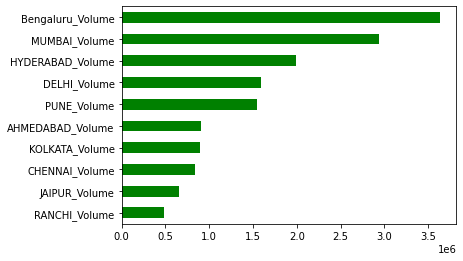

In [19]:
Volume.sort_values(inplace=True)
Volume.plot(kind='barh',y='Mandi Onion Volume from 2015-2020',x='Mandi',color='g')

# Line pLot for wholesale price

In [20]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot
import plotly.graph_objs as go

BlrWholesale = go.Scatter(
x=df2.Date,
y=df2.Bengaluru_WholesalePrice,
name="Bengaluru")

MumbaiWholesale = go.Scatter(
x=df2.Date,
y=df2.MUMBAI_WholesalePrice,
name="Mumbai")

ChennaiWholesale = go.Scatter(
x=df2.Date,
y=df2.CHENNAI_WholesalePrice,
name="Chennai")

HydWholesale = go.Scatter(
x=df2.Date,
y=df2.HYDERABAD_WholesalePrice,
name="Hyderabad")

DELHIWholesale = go.Scatter(
x=df2.Date,
y=df2.DELHI_WholesalePrice,
name="Delhi")

AHMWholesale = go.Scatter(
x=df2.Date,
y=df2.AHMEDABAD_WholesalePrice,
name="Ahmedabad")

PuneWholesale = go.Scatter(
x=df2.Date,
y=df2.PUNE_WholesalePrice,
name="Pune")

JaiWholesale = go.Scatter(
x=df2.Date,
y=df2.JAIPUR_WholesalePrice,
name="Jaipur")

RaiWholesale = go.Scatter(
x=df2.Date,
y=df2.RANCHI_WholesalePrice,
name="Ranchi")

KolWholesale = go.Scatter(
x=df2.Date,
y=df2.KOLKATA_WholesalePrice,
name="Kolkata")

data = [BlrWholesale, MumbaiWholesale, ChennaiWholesale,HydWholesale,DELHIWholesale,AHMWholesale,PuneWholesale,JaiWholesale,RaiWholesale,KolWholesale]

layout = go.Layout(
xaxis=dict(

    zeroline=True,
    showline=True,
    mirror='ticks',
    gridcolor='#bdbdbd',
    gridwidth=2,
    zerolinecolor='#969696',
    zerolinewidth=4,
    linecolor='#636363',
    linewidth=6
),
yaxis=dict(

    zeroline=True,
    showline=True,
    mirror='ticks',
    gridcolor='#bdbdbd',
    gridwidth=2,
    zerolinecolor='#969696',
    zerolinewidth=4,
    linecolor='#636363',
    linewidth=6
)
)
fig = go.Figure(data=data, layout=layout)
plot(fig)


'temp-plot.html'

# Line plot for Retail price

In [21]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot
import plotly.graph_objs as go

BlrRetail = go.Scatter(
x=df2.Date,
y=df2.Bengaluru_RetailPrice,
name="Bengaluru")

MumbaiRetail = go.Scatter(
x=df2.Date,
y=df2.MUMBAI_RetailPrice,
name="Mumbai")

ChennaiRetail = go.Scatter(
x=df2.Date,
y=df2.CHENNAI_RetailPrice,
name="Chennai")

HydRetail = go.Scatter(
x=df2.Date,
y=df2.HYDERABAD_RetailPrice,
name="Hyderabad")

DELHIRetail = go.Scatter(
x=df2.Date,
y=df2.DELHI_RetailPrice,
name="Delhi")

AHMRetail = go.Scatter(
x=df2.Date,
y=df2.AHMEDABAD_RetailPrice,
name="Ahmedabad")

PuneRetail = go.Scatter(
x=df2.Date,
y=df2.PUNE_RetailPrice,
name="Pune")

JaiRetail = go.Scatter(
x=df2.Date,
y=df2.JAIPUR_RetailPrice,
name="Jaipur")

RaiRetail = go.Scatter(
x=df2.Date,
y=df2.RANCHI_RetailPrice,
name="Ranchi")

KolRetail = go.Scatter(
x=df2.Date,
y=df2.KOLKATA_RetailPrice,
name="Kolkata")

data = [BlrRetail, MumbaiRetail, ChennaiRetail,HydRetail,DELHIRetail,AHMRetail,PuneRetail,JaiRetail,RaiRetail,KolRetail]

layout = go.Layout(
xaxis=dict(

    zeroline=True,
    showline=True,
    mirror='ticks',
    gridcolor='#bdbdbd',
    gridwidth=2,
    zerolinecolor='#969696',
    zerolinewidth=4,
    linecolor='#636363',
    linewidth=6
),
yaxis=dict(

    zeroline=True,
    showline=True,
    mirror='ticks',
    gridcolor='#bdbdbd',
    gridwidth=2,
    zerolinecolor='#969696',
    zerolinewidth=4,
    linecolor='#636363',
    linewidth=6
)
)
fig = go.Figure(data=data, layout=layout)
plot(fig)

'temp-plot.html'

In [22]:
# Top 10 Onion Mandi In India map
import folium

In [23]:
Onion_mandi = pd.read_csv("/content/drive/My Drive/Capstone_Commodity_SureshaHP/Backup/Onion_centroids.csv")
Onion_mandi.head()

,TopOnionMandi,Latitude,Longitude,Volume
0,HYDERABAD,17.389716,78.466689,1992376.906
1,DELHI,28.645944,77.128045,1586372.825
2,AHMEDABAD,22.605426,72.238981,904608.000
3,RANCHI,23.184235,85.317819,482714.000
4,Bengaluru,12.901925,77.586856,3639731.708


In [24]:
pip install gmplot

     |████████████████████████████████| 174kB 2.9MB/s 


In [25]:
# import gmplot package 
import gmplot 
  
latitude_list = Onion_mandi['Latitude'] 
longitude_list = Onion_mandi ['Longitude'] 
  
gmap3 = gmplot.GoogleMapPlotter(30.3164945, 
                                78.03219179999999, 13) 
  
# scatter method of map object  
# scatter points on the google map 
gmap3.scatter( latitude_list, longitude_list, '# FF0000', 
                              size = 40, marker = False ) 
  
# Plot method Draw a line in 
# between given coordinates 
gmap3.plot(latitude_list, longitude_list,  
           'cornflowerblue', edge_width = 2.5) 
  
gmap3.draw( "map13.html" )
